In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


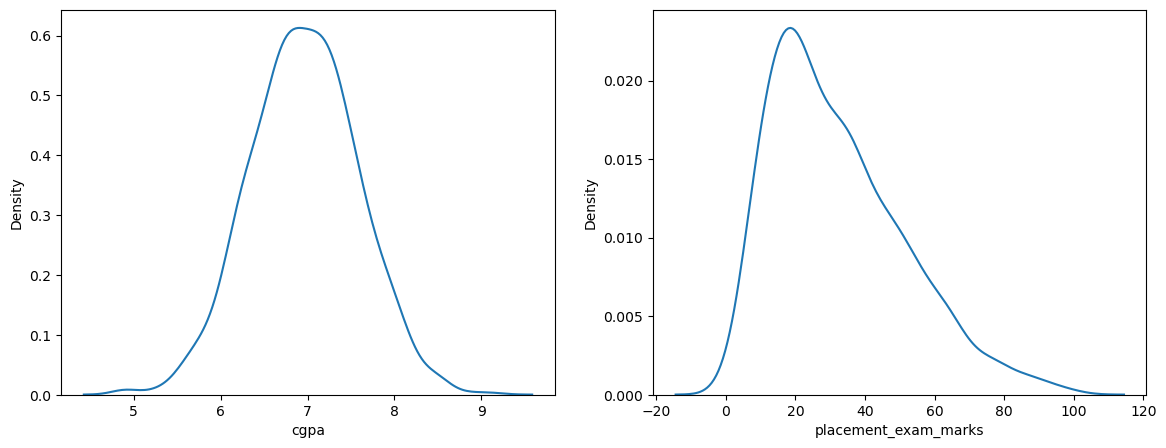

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])
plt.show()

In [6]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks'>

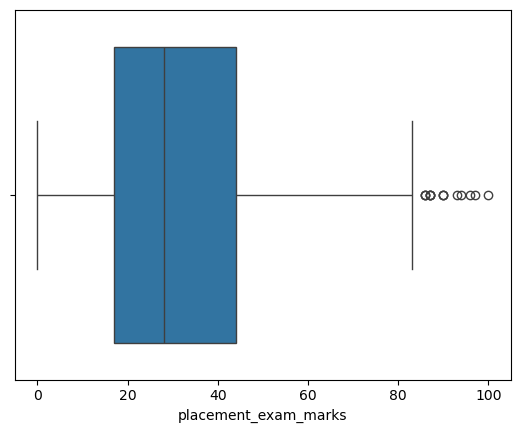

In [9]:
sns.boxplot(x=df['placement_exam_marks'])

In [11]:
# finding the iqr
percentile_25=df['placement_exam_marks'].quantile(0.25)
percentile_75=df['placement_exam_marks'].quantile(0.75)

In [12]:
percentile_25,percentile_75

(np.float64(17.0), np.float64(44.0))

In [13]:
iqr=percentile_75-percentile_25

In [14]:
iqr

np.float64(27.0)

In [16]:
lower_limit=percentile_25 - 1.5 * iqr
higher_limit=percentile_75 + 1.5 * iqr

In [17]:
lower_limit,higher_limit

(np.float64(-23.5), np.float64(84.5))

In [22]:
# finding outliers
df[df['placement_exam_marks'] > higher_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [23]:
df[ df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [25]:
df[(df['placement_exam_marks'] > higher_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# trimming

In [29]:
df_new=df[df['placement_exam_marks'] < higher_limit]
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [30]:
df_new.shape

(985, 3)

# capping

In [31]:
new_df_copy=df.copy()

In [32]:
new_df_copy

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [33]:
new_df_copy['placemet_exam_marks']=np.where(df['placement_exam_marks'] > higher_limit , higher_limit, np.where(df['placement_exam_marks'] < lower_limit , lower_limit,df['placement_exam_marks']))

In [34]:
new_df_copy


,cgpa,placement_exam_marks,placed,placemet_exam_marks
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0
...,...,...,...,...
995,8.87,44.0,1,44.0
996,9.12,65.0,1,65.0
997,4.89,34.0,0,34.0
998,8.62,46.0,1,46.0


<Axes: >

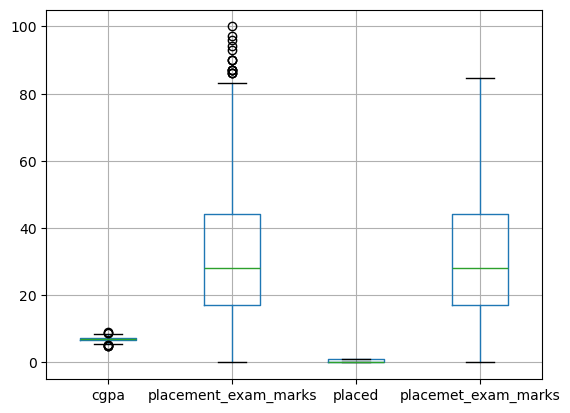

In [39]:
new_df_copy.boxplot()